# Landslide Prevention and Innovation Challenge

This notebook is for explorary data analysis of Landslide Prevention and Innovation Challenge on Zindi platform https://zindi.africa/competitions/landslide-prevention-and-innovation-challenge.

<p align="center" width="100%">
    <img src="https://zindi-public-release.s3.eu-west-2.amazonaws.com/uploads/competition/image/293/thumb_22b67b9a-7763-48de-9c1d-15a8bedff257.png">
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle

import warnings, gc
warnings.filterwarnings('ignore')

pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# Read files to pandas dataframes
df_train =pd.read_csv('../input/start-hack-22/Train.csv', index_col=0)
df_test =pd.read_csv('../input/start-hack-22/Test.csv')
y_train=df_train['Label'].values
df_subm  = pd.read_csv('../input/start-hack-22/SampleSubmission.csv')

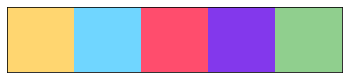

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [4]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total number of rows (Train):', df_train_row_count)
print('Total number of columns (Train):', df_train_column_count)

Total number of rows (Train): 10864
Total number of columns (Train): 226


In [5]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total number of rows (Test):', df_test_row_count)
print('Total number of columns (Test):', df_test_column_count)

Total number of rows (Test): 5430
Total number of columns (Test): 226


In [6]:
df_train.head()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
Sample_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,

# **Exploratory Data Analysis**

In [40]:
df_train.describe().T.sample(9)

,count,mean,std,min,25%,50%,75%,max
8_placurv,9304.0,0.001510,0.022849,-0.114195,-0.012738,0.001283,0.016304,0.114553
9_geology,9304.0,2.972592,1.087290,1.000000,2.000000,3.000000,3.000000,7.000000
6_twi,9304.0,4.383041,1.220659,1.323062,3.545759,4.174007,4.981968,10.538309
10_elevation,9304.0,237.225279,158.838522,4.000000,115.750000,206.000000,323.000000,911.000000
18_geology,9304.0,2.970335,1.086292,1.000000,2.000000,3.000000,3.000000,7.000000
6_placurv,9304.0,0.002900,0.024298,-0.119338,-0.011763,0.002923,0.017622,0.121986
8_slope,9304.0,29.950965,9.508624,5.710593,22.989770,30.246260,36.055030,68.385820
4_procurv,9304.0,0.000517,0.018805,-0.089754,-0.010001,0.000140,0.010887,0.089693
24_geology,9304.0,2.974527,1.087239,1.000000,2.000000,3.000000,3.000000,7.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 1 to 10864
Columns: 226 entries, 1_elevation to Label
dtypes: float64(175), int64(51)
memory usage: 18.8 MB


In [9]:
base_num_features=['elevation',  'lsfactor', 'placurv', 'procurv', 'sdoif', 'slope', 'twi', 'aspect']
base_cat_features=['geology']
for col in base_cat_features:
    cat_features=[x for x in df_train.columns if col in x] 

# Missing values

In [10]:
# there is no missing data
df_train.isna().sum().sum()

0

In [11]:
target_class = pd.DataFrame({'count': df_train.Label.value_counts(),
                             'percentage': df_train['Label'].value_counts() / df_train.shape[0] * 100
})

In [12]:
target_class

,count,percentage
0,8148,75.0
1,2716,25.0


In [13]:
df_train.loc[df_train["3_elevation"] >= 100, "3_elevation"]

Sample_ID
1        127
2        155
3        154
5        114
6        314
        ... 
10859    246
10860    201
10861    427
10862    342
10864    233
Name: 3_elevation, Length: 8198, dtype: int64

# Dealing with outliers

In [14]:
def drop_outliers(train, train_test_flag = "train"):

    for col in train.columns[1:-1]:

        # IQR
        Q1 = np.percentile(train[col], 10, # Q1 = np.percentile(train[col], 25,
                           interpolation = 'midpoint')

        Q3 = np.percentile(train[col], 90, # Q3 = np.percentile(train[col], 75,
                           interpolation = 'midpoint')
        IQR = Q3 - Q1

        upper = Q3 + 1.5*IQR
        lower = Q1 - 1.5*IQR
        
        if train_test_flag == "train" :

            train.loc[((train[col] >= upper) & (train['Label'] == 1)), col] = upper
            train.loc[((train[col] <= lower) & (train['Label'] == 1)), col] = lower

            # Above Upper bound
            upper = ((train[col] >= (Q3+1.5*IQR)) & (train['Label'] == 0))
            # print("Upper bound:",upper)
            # print(np.where(upper))

            train = train.drop(index = np.where(upper)[0]).reset_index(drop=True)

            # Below Lower bound
            lower = (train[col] <= (Q1-1.5*IQR)) & (train['Label'] == 0)
            # print("Lower bound:", lower)
            # print(np.where(lower))

            train = train.drop(index = np.where(lower)[0]).reset_index(drop=True)   
            
        else:
            
            train.loc[train[col] >= upper, col] = upper
            train.loc[train[col] <= lower, col] = lower
            
    return train

In [15]:
df_train = drop_outliers(df_train, train_test_flag = "train")
df_test = drop_outliers(df_test, train_test_flag = "test")

In [16]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#90cf8e","#ff70a6"]),
                  title = dict(text = 'Label Distribution'))  
fig.show()

In [17]:
allf_features = base_num_features+base_cat_features

i=0
for num_feature in allf_features:    
    cols=[x  for x in df_train.columns if num_feature in x ]+["Label"]
    #print (f"num_feature: {num_feature} \n   len cols: {len(cols)}")
    df=df_train[cols]
    
    corr = df.corr()
    i+=1
    if i == 2:
        break

In [18]:
corr.tail(3)

,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,Label
24_lsfactor,0.457662,0.473286,0.486225,0.497717,0.495636,0.495028,0.524630,0.537027,0.542525,0.543783,0.524826,0.581853,0.632434,0.641963,0.626050,0.547560,0.642618,0.770472,0.832634,0.766088,0.562476,0.665245,0.833727,1.000000,0.826336,0.109681
25_lsfactor,0.430219,0.457317,0.475767,0.495831,0.507369,0.460434,0.495659,0.519146,0.542569,0.559209,0.473853,0.526126,0.583075,0.629782,0.652261,0.493290,0.552497,0.647798,0.774319,0.823405,0.501077,0.559298,0.660436,0.826336,1.000000,0.105791
Label,0.104339,0.161851,0.226709,0.230020,0.170891,0.118478,0.220583,0.315662,0.315781,0.217864,0.112501,0.211871,0.299588,0.300644,0.212092,0.094172,0.143963,0.194042,0.194747,0.162577,0.072762,0.096358,0.110307,0.109681,0.105791,1.000000


# Pearson correlation coefficient

The Pearson correlation coefficient measures the linear association between variables. Its value can be interpreted like so:

+1 - Complete positive correlation
+0.8 - Strong positive correlation
+0.6 - Moderate positive correlation
0 - no correlation whatsoever
-0.6 - Moderate negative correlation
-0.8 - Strong negative correlation
-1 - Complete negative correlation

In [42]:
strong_pairs = corr[abs(corr) < 0.5]
strong_pairs.sample(5)

,mean_elevation,std_elevation,Label,mean_lsfactor,std_lsfactor,mean_placurv,std_placurv,mean_procurv,std_procurv,mean_sdoif,std_sdoif,mean_slope,std_slope,mean_twi,std_twi,mean_aspect,std_aspect,mean_geology,std_geology
std_slope,-0.178480,0.147636,0.188066,-0.019915,NaN,0.001146,0.420850,0.096021,NaN,-0.027436,0.019423,0.087632,NaN,-0.171320,0.387388,0.010117,0.245878,0.013009,0.044022
std_procurv,-0.108012,0.384898,0.211900,0.139680,0.430499,-0.010636,0.484093,0.039981,NaN,-0.055263,0.024605,0.307478,NaN,-0.291908,0.214217,0.000601,0.130117,-0.029541,0.011101
mean_lsfactor,0.222125,NaN,0.226542,NaN,0.238116,-0.402758,0.172869,-0.302423,0.139680,0.106508,-0.044076,NaN,-0.019915,0.223521,-0.093954,0.044175,-0.129083,0.106696,-0.002633
mean_procurv,0.041692,-0.106869,-0.041975,-0.302423,-0.028476,NaN,0.022635,NaN,0.039981,0.003158,0.007178,-0.110853,0.096021,-0.459674,-0.242969,0.036899,0.037730,-0.099924,-0.088445
Label,0.028765,0.366792,NaN,0.226542,0.164989,-0.072476,0.262178,-0.041975,0.211900,0.131134,-0.031691,0.341478,0.188066,-0.210654,-0.035356,0.007339,-0.041459,0.068900,-0.060245


In [44]:
#strong_pairs[corr.columns[:-1]][:-1].dropna(axis = 1, how ='all', thresh = None, subset = None, inplace=False)

# Variance Inflation Factor 

The valid value for VIF ranges from 1 to infinity. A rule of thumb for interpreting VIF values is:

1 — features are not correlated
1<VIF<5 — features are moderately correlated
VIF>5 — features are highly correlated
VIF>10 — high correlation between features and is cause for concern

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif}) # pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [23]:
allf_features = base_num_features+base_cat_features

all_VIF = pd.DataFrame([])
for num_feature in allf_features:    
    cols=[x  for x in df_train.columns if num_feature in x ]+["Label"]
    #print (f"num_feature: {num_feature} \n   len cols: {len(cols)}")
    df=df_train[cols]

    features = df.columns.tolist()
    #features.append('Label')
    VIF = calculate_vif(df, features)
    for _ in range(len(features)-2):
        #print(len(features))
        if VIF['VIF'].max() > 17.5:
            features.remove(VIF['VIF'].idxmax())
            VIF = calculate_vif(df, features)
    all_VIF = all_VIF.append(VIF[:-1])

In [24]:
all_VIF[:5]

,VIF
25_elevation,1.000729
10_lsfactor,7.065378
11_lsfactor,7.897977
12_lsfactor,9.068467
13_lsfactor,9.894717


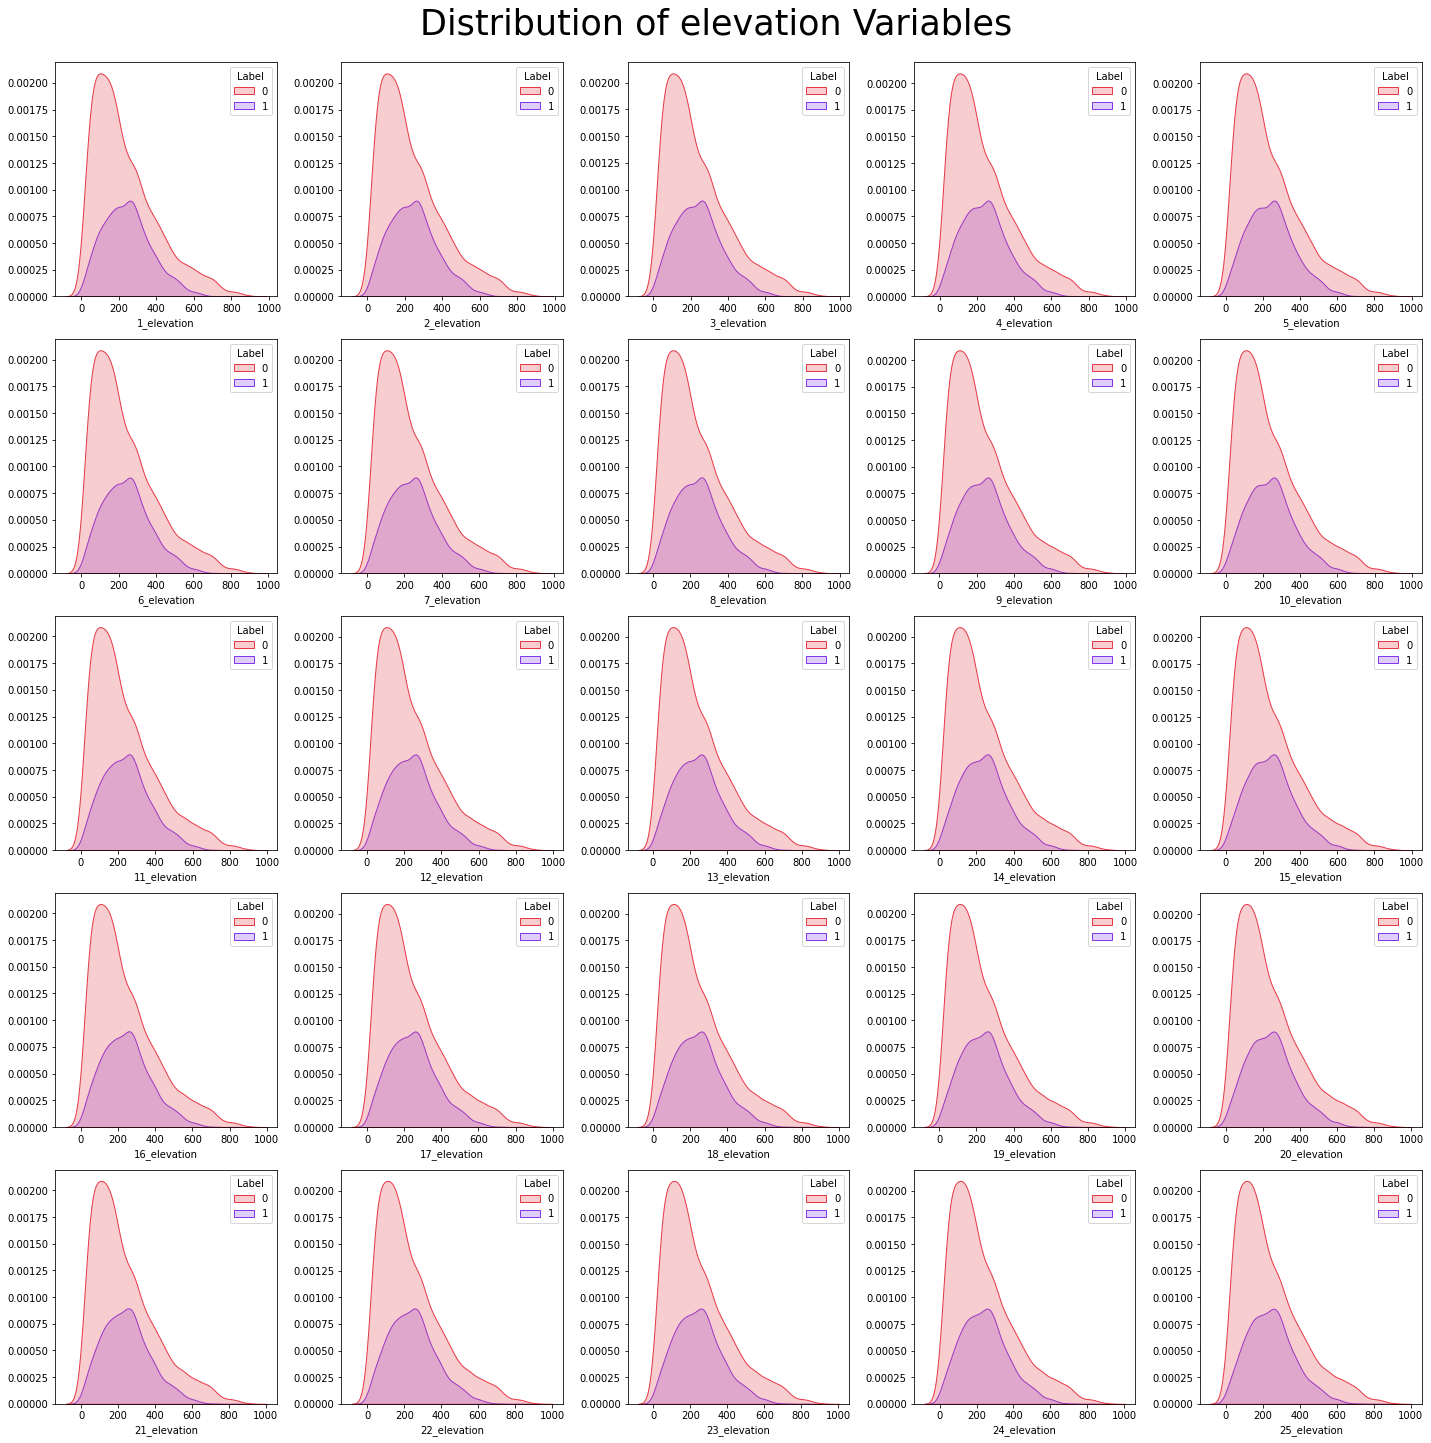

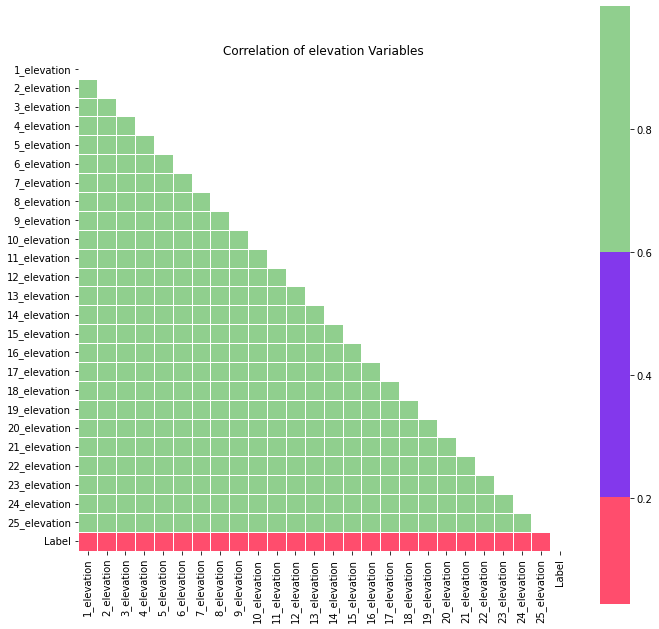

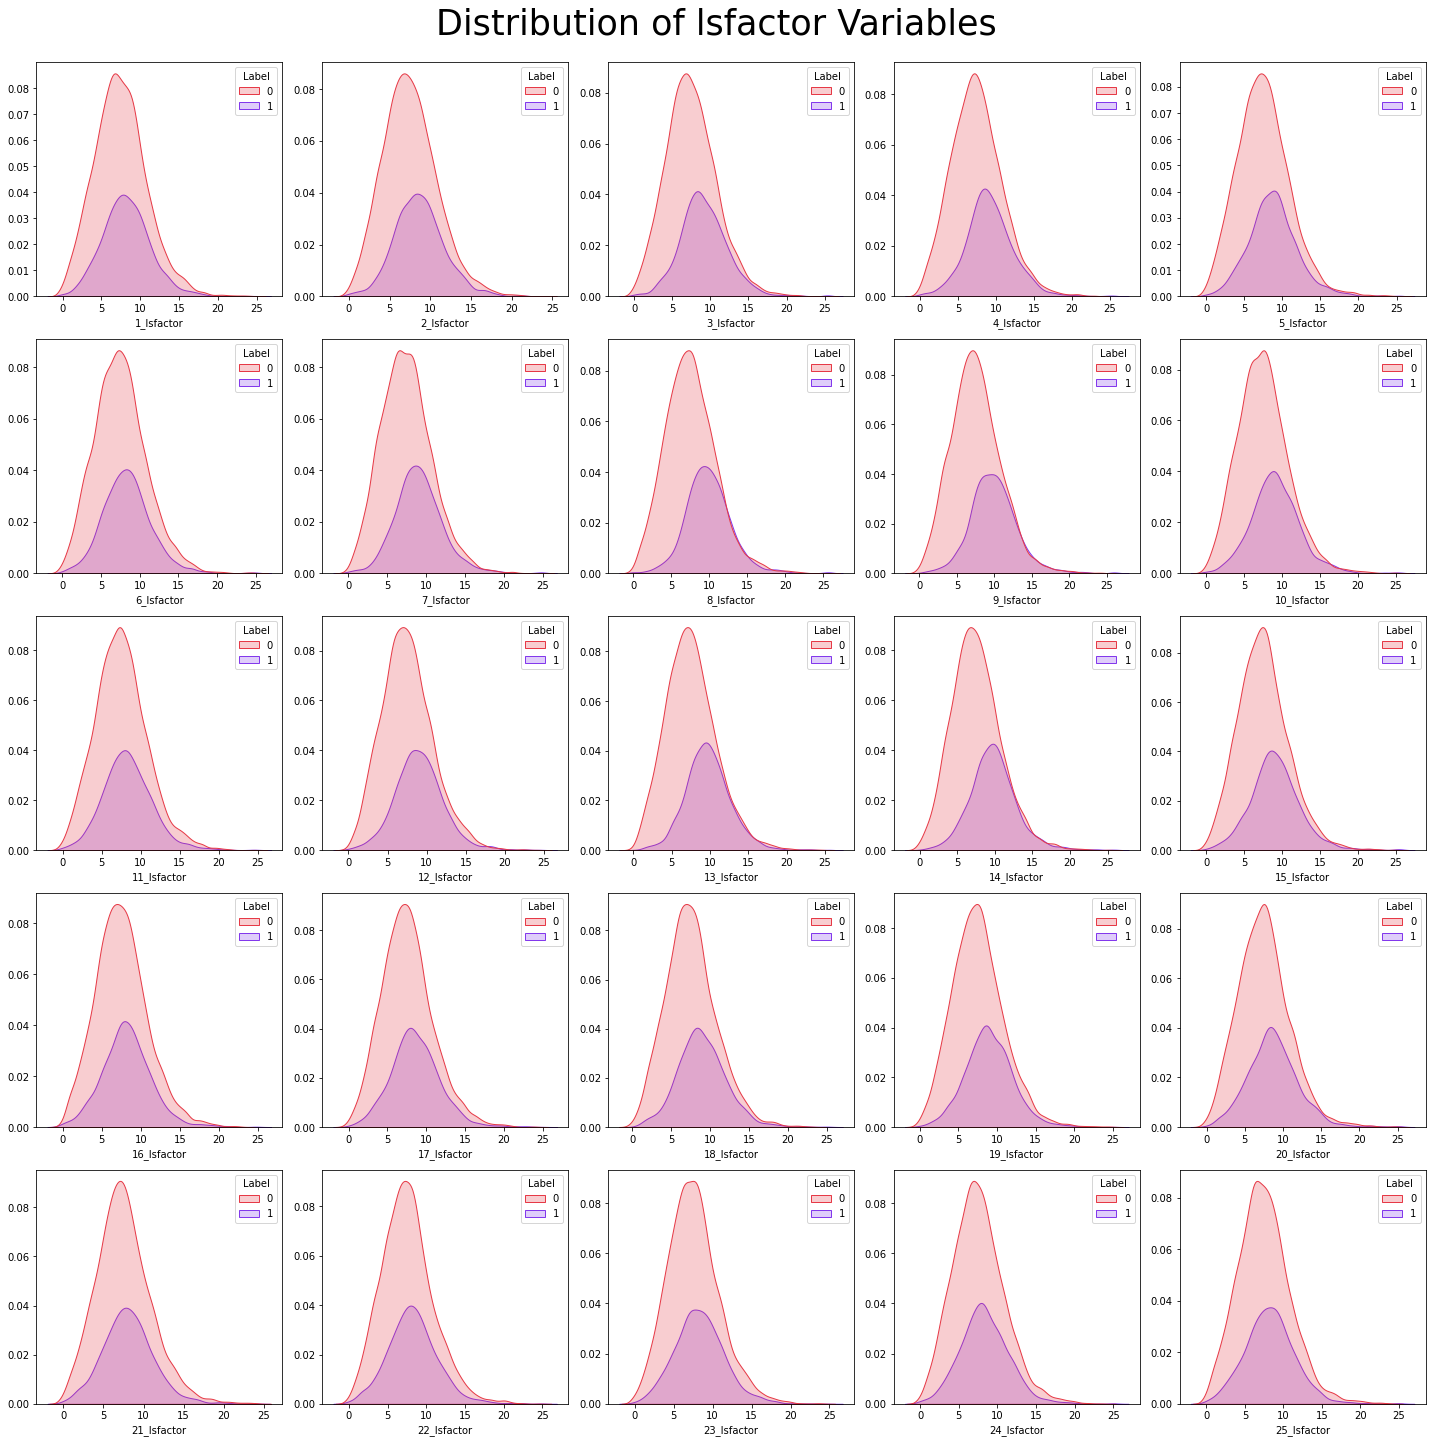

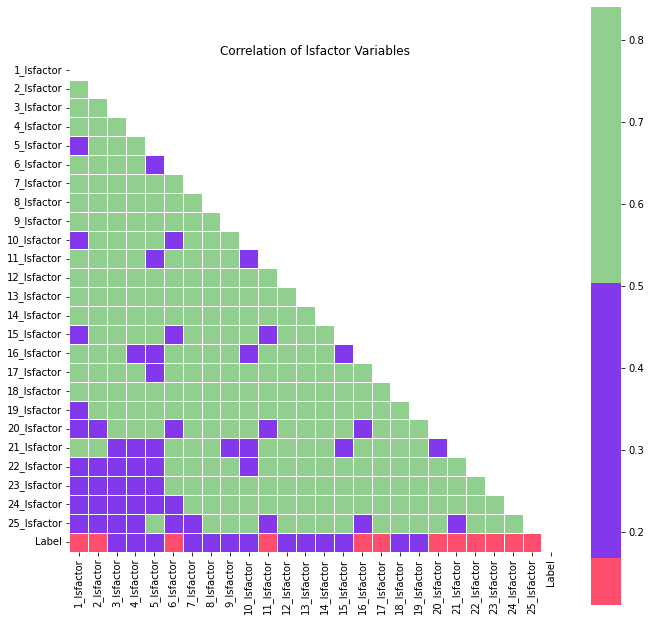

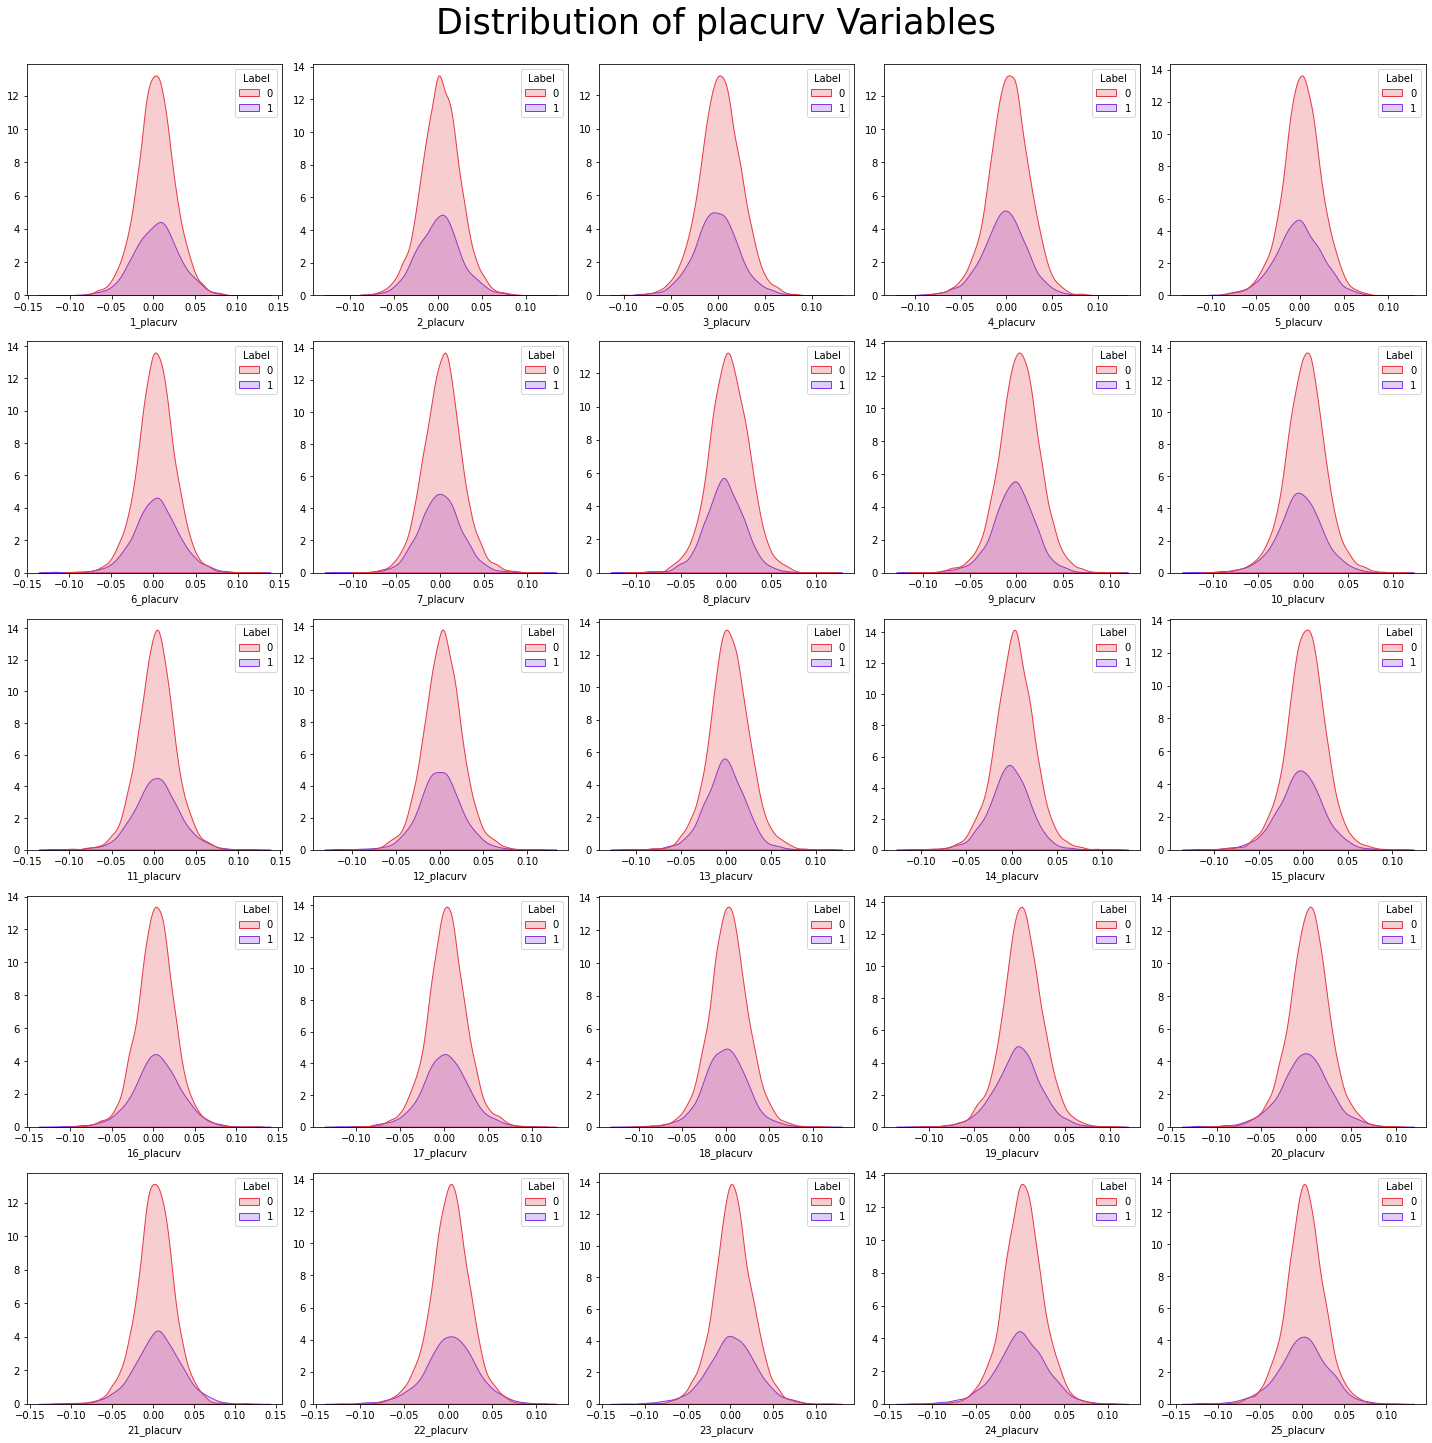

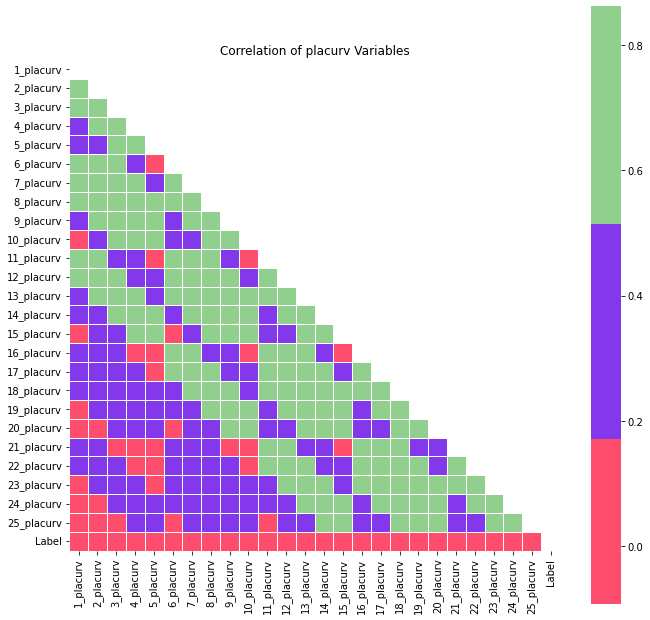

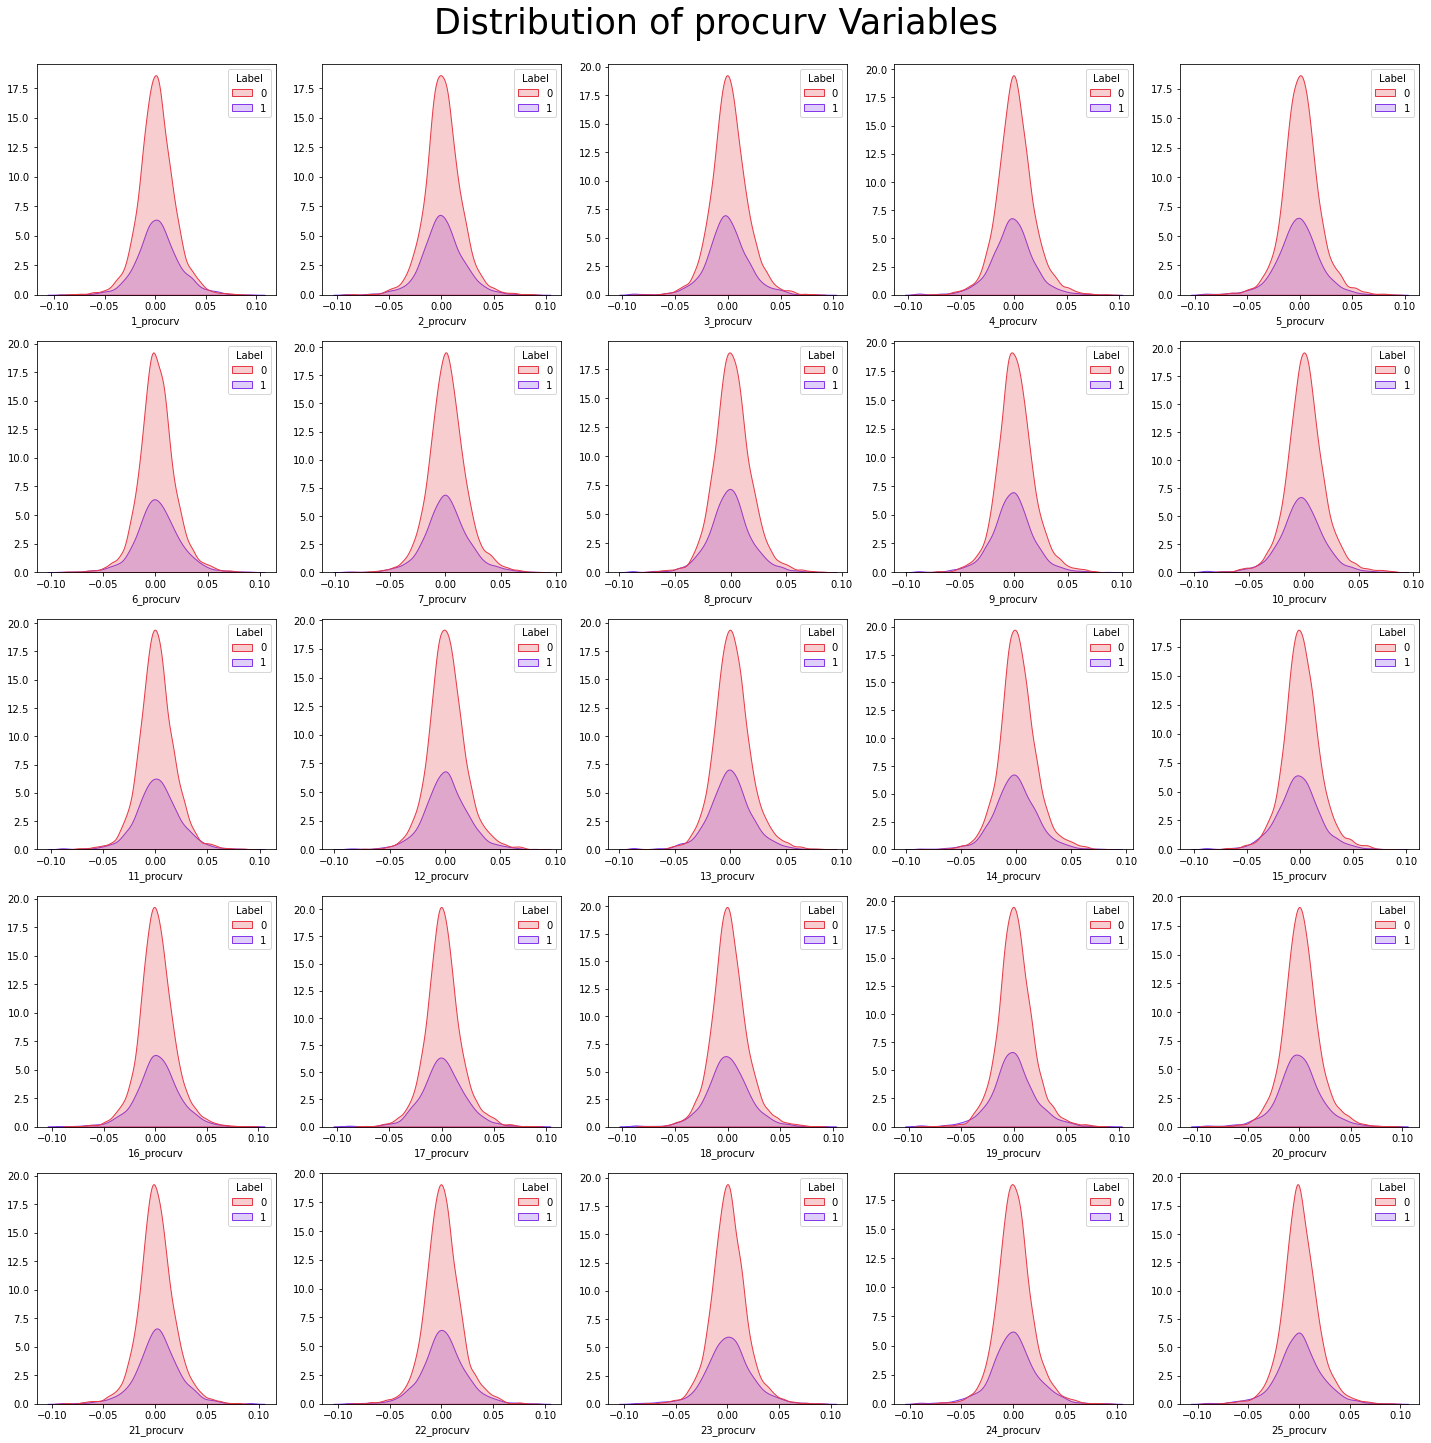

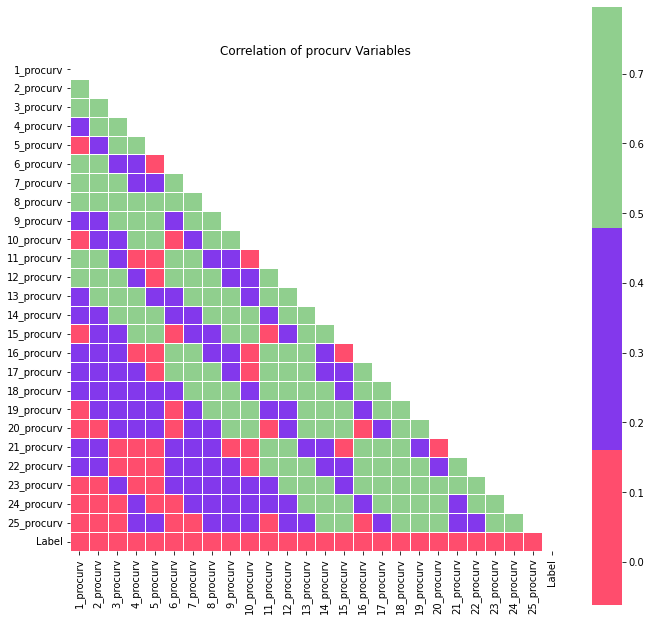

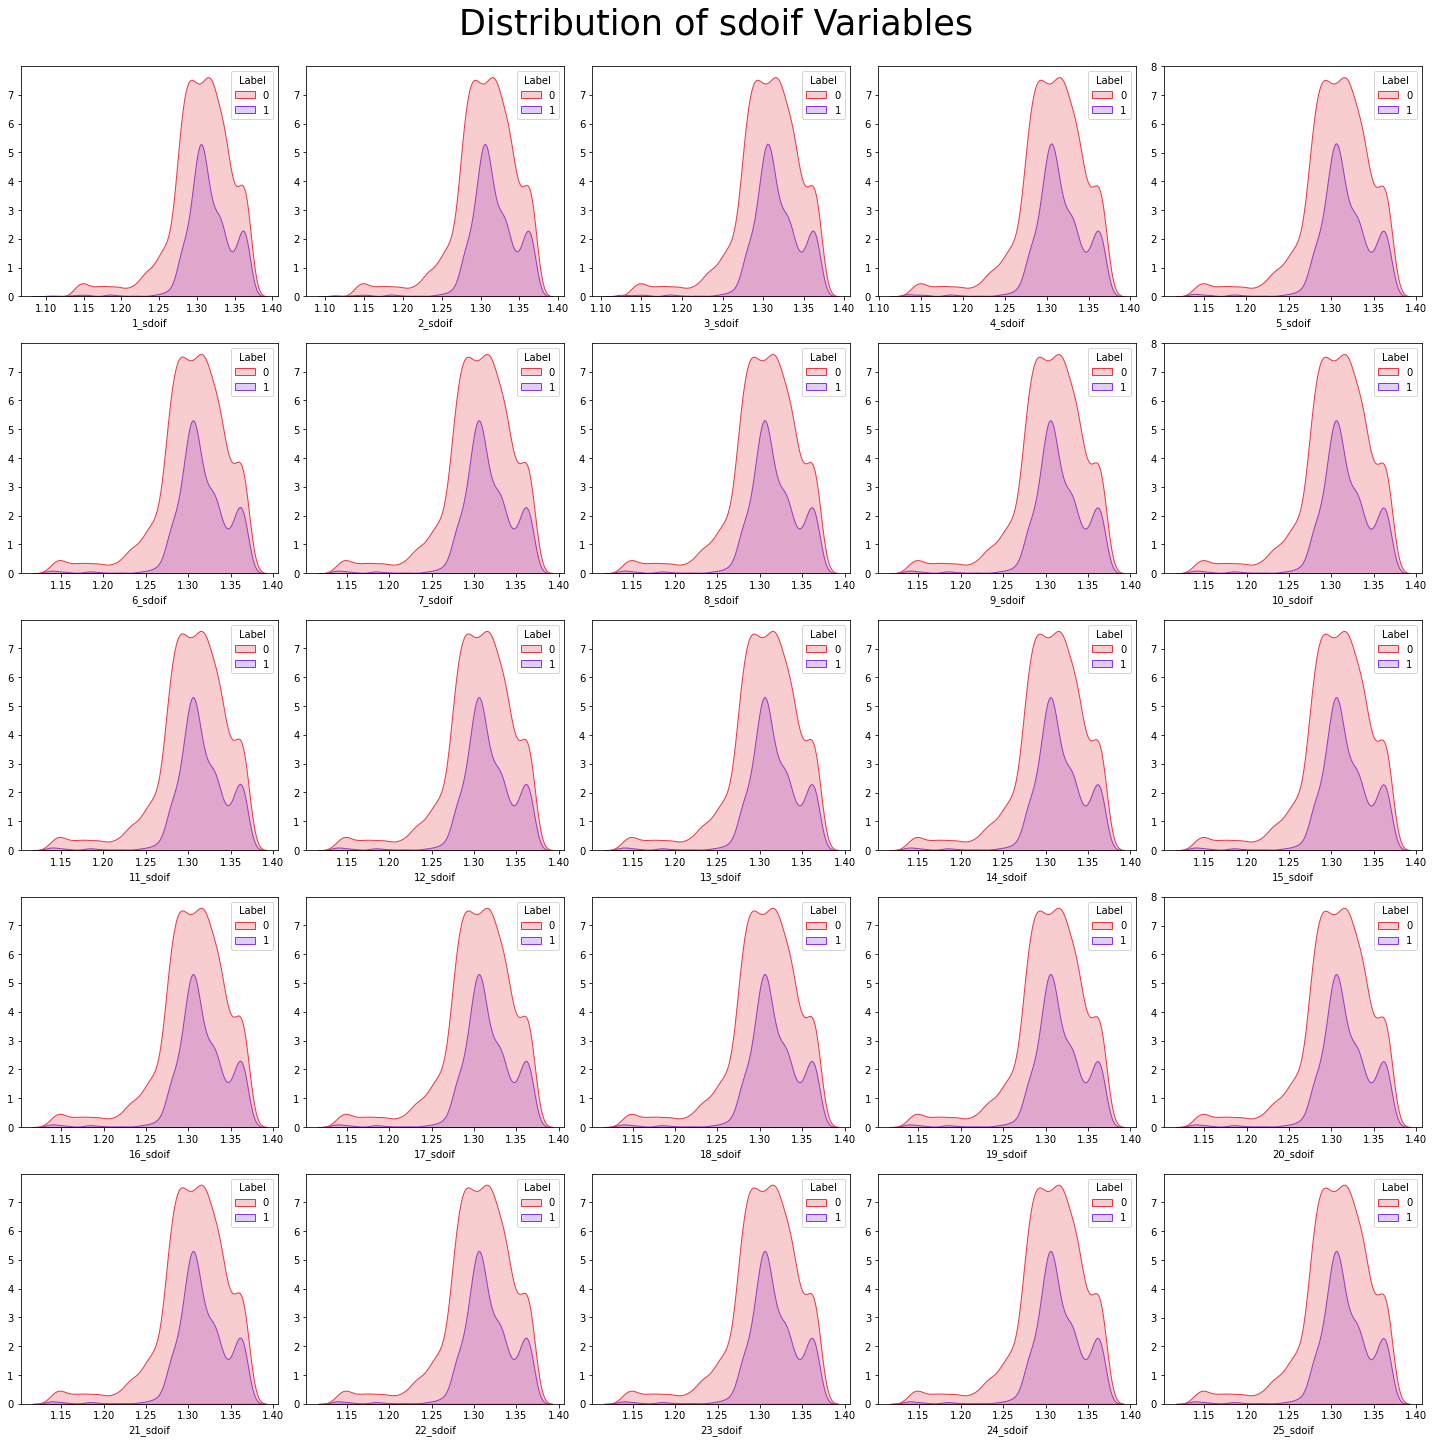

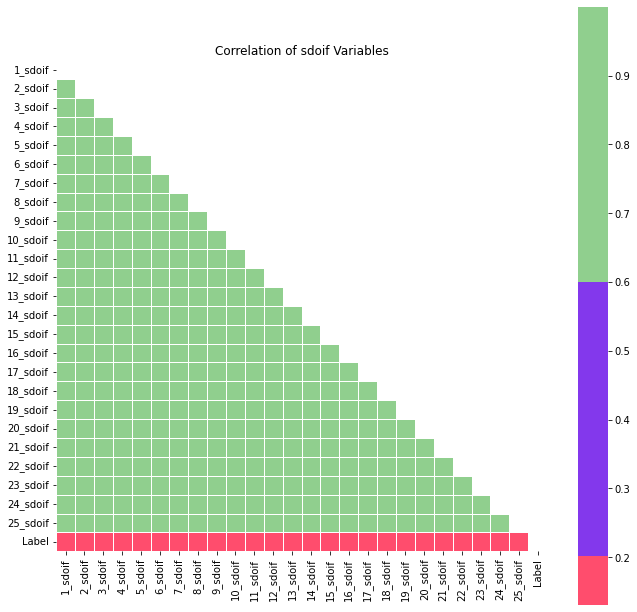

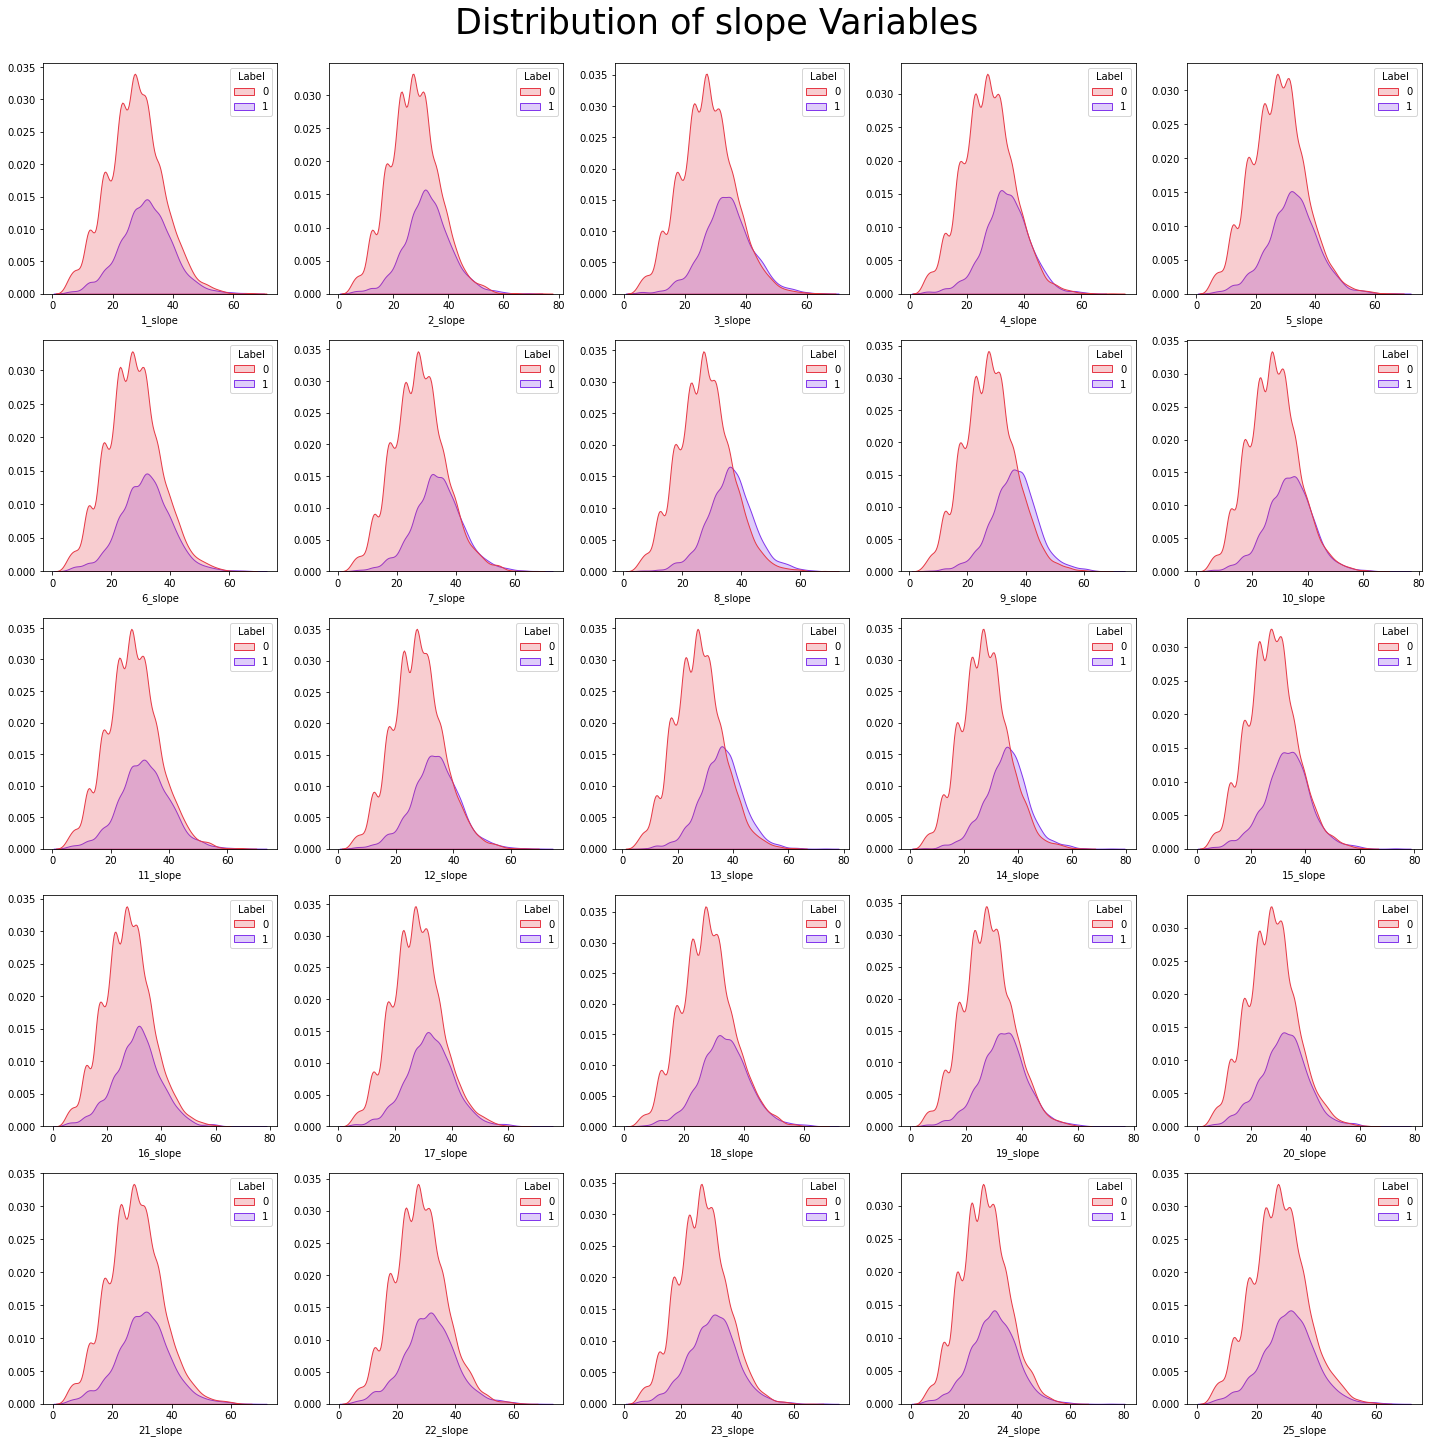

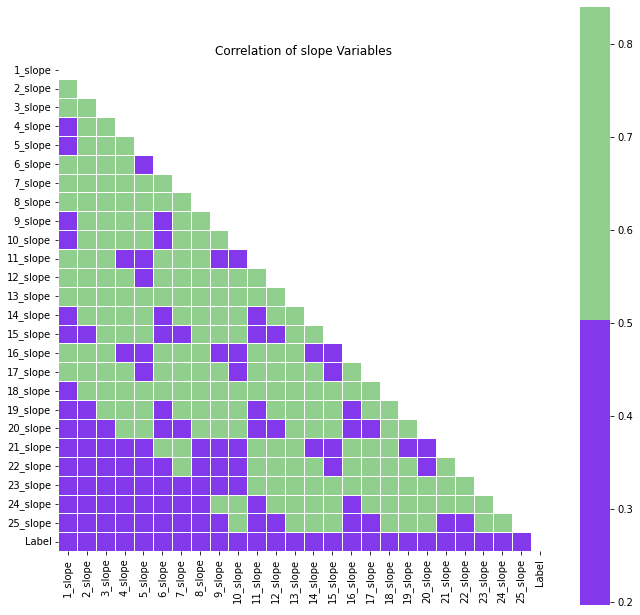

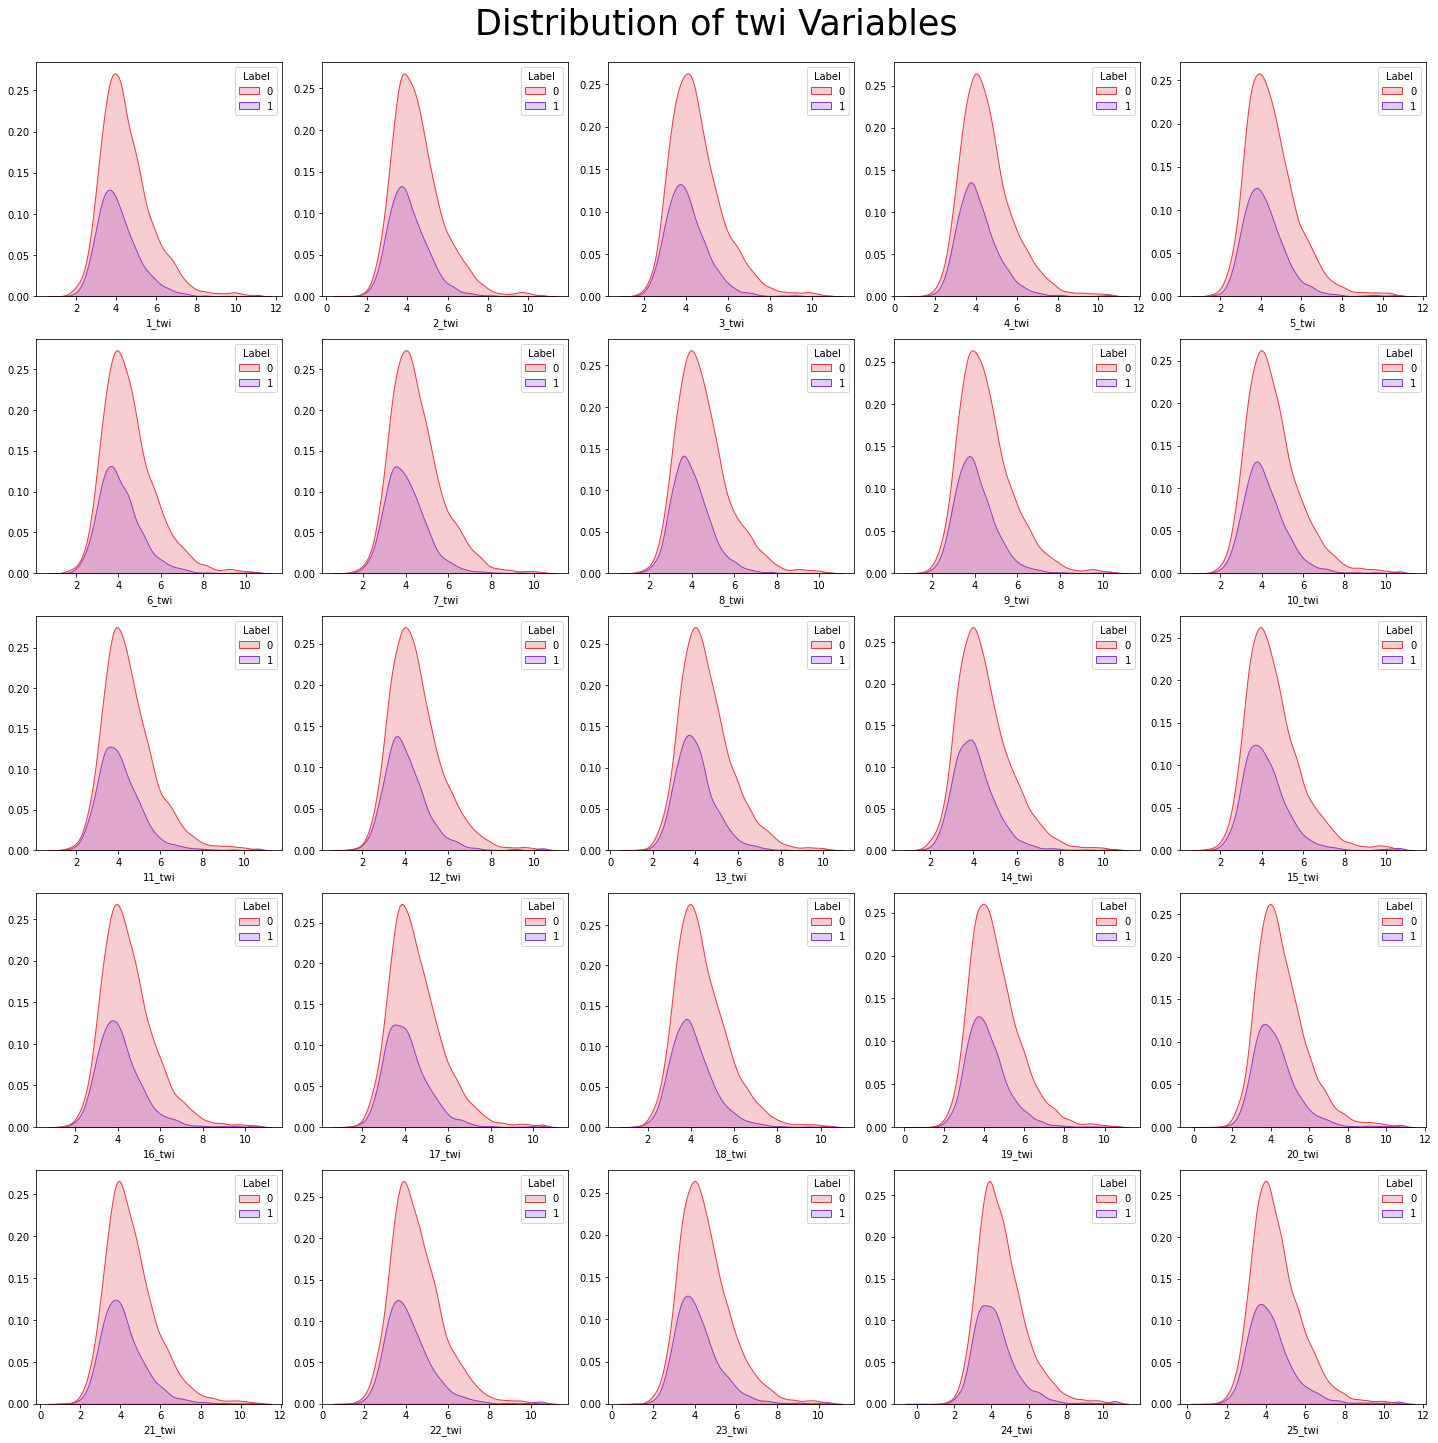

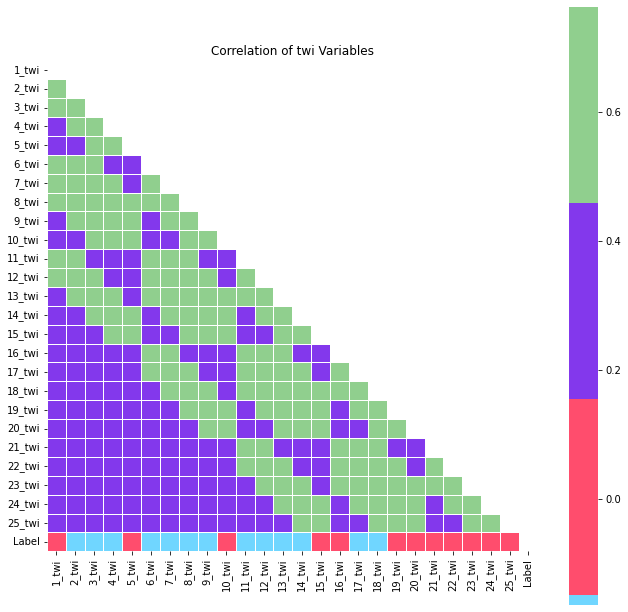

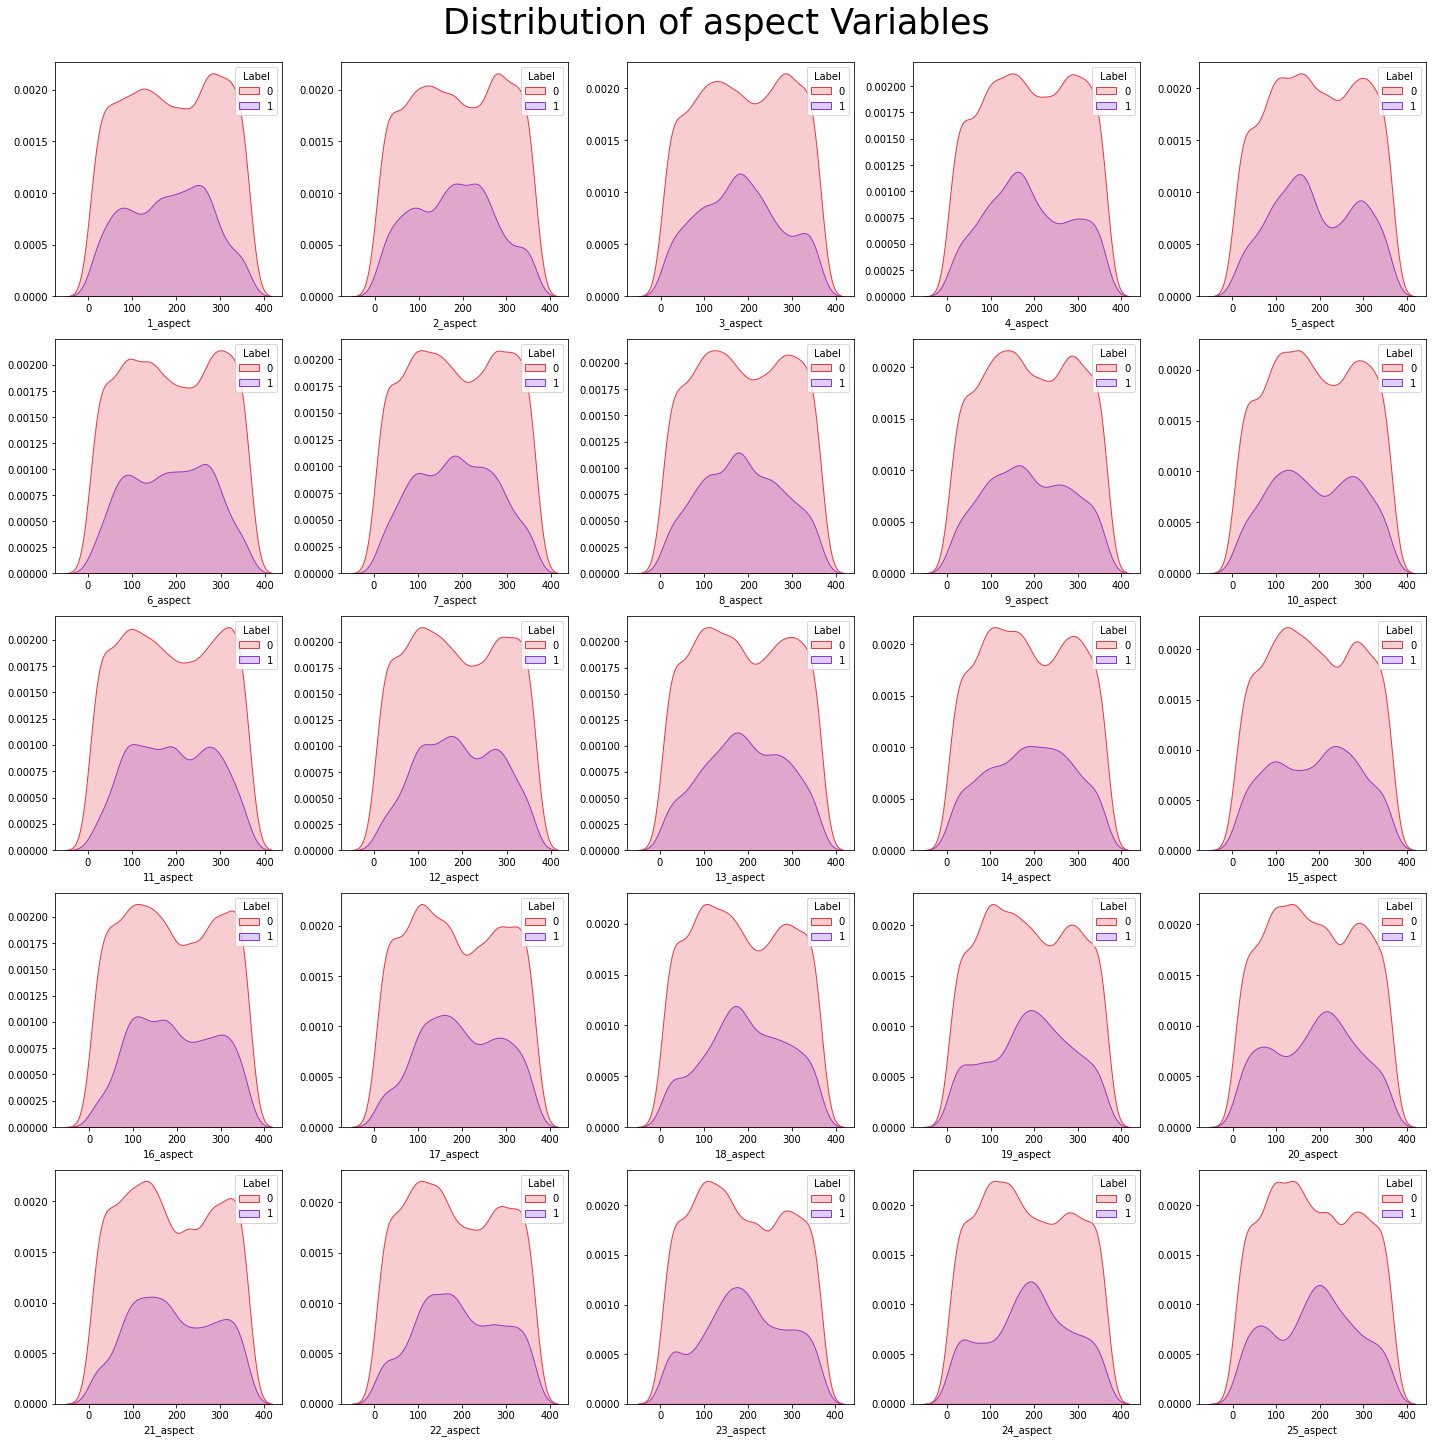

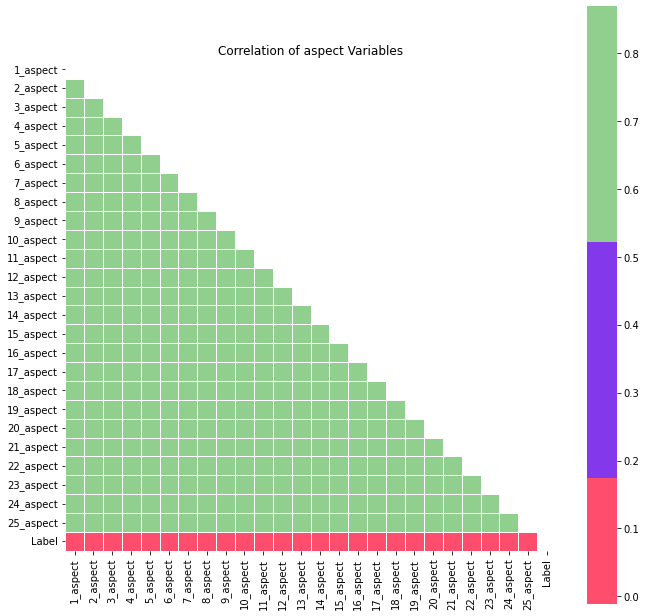

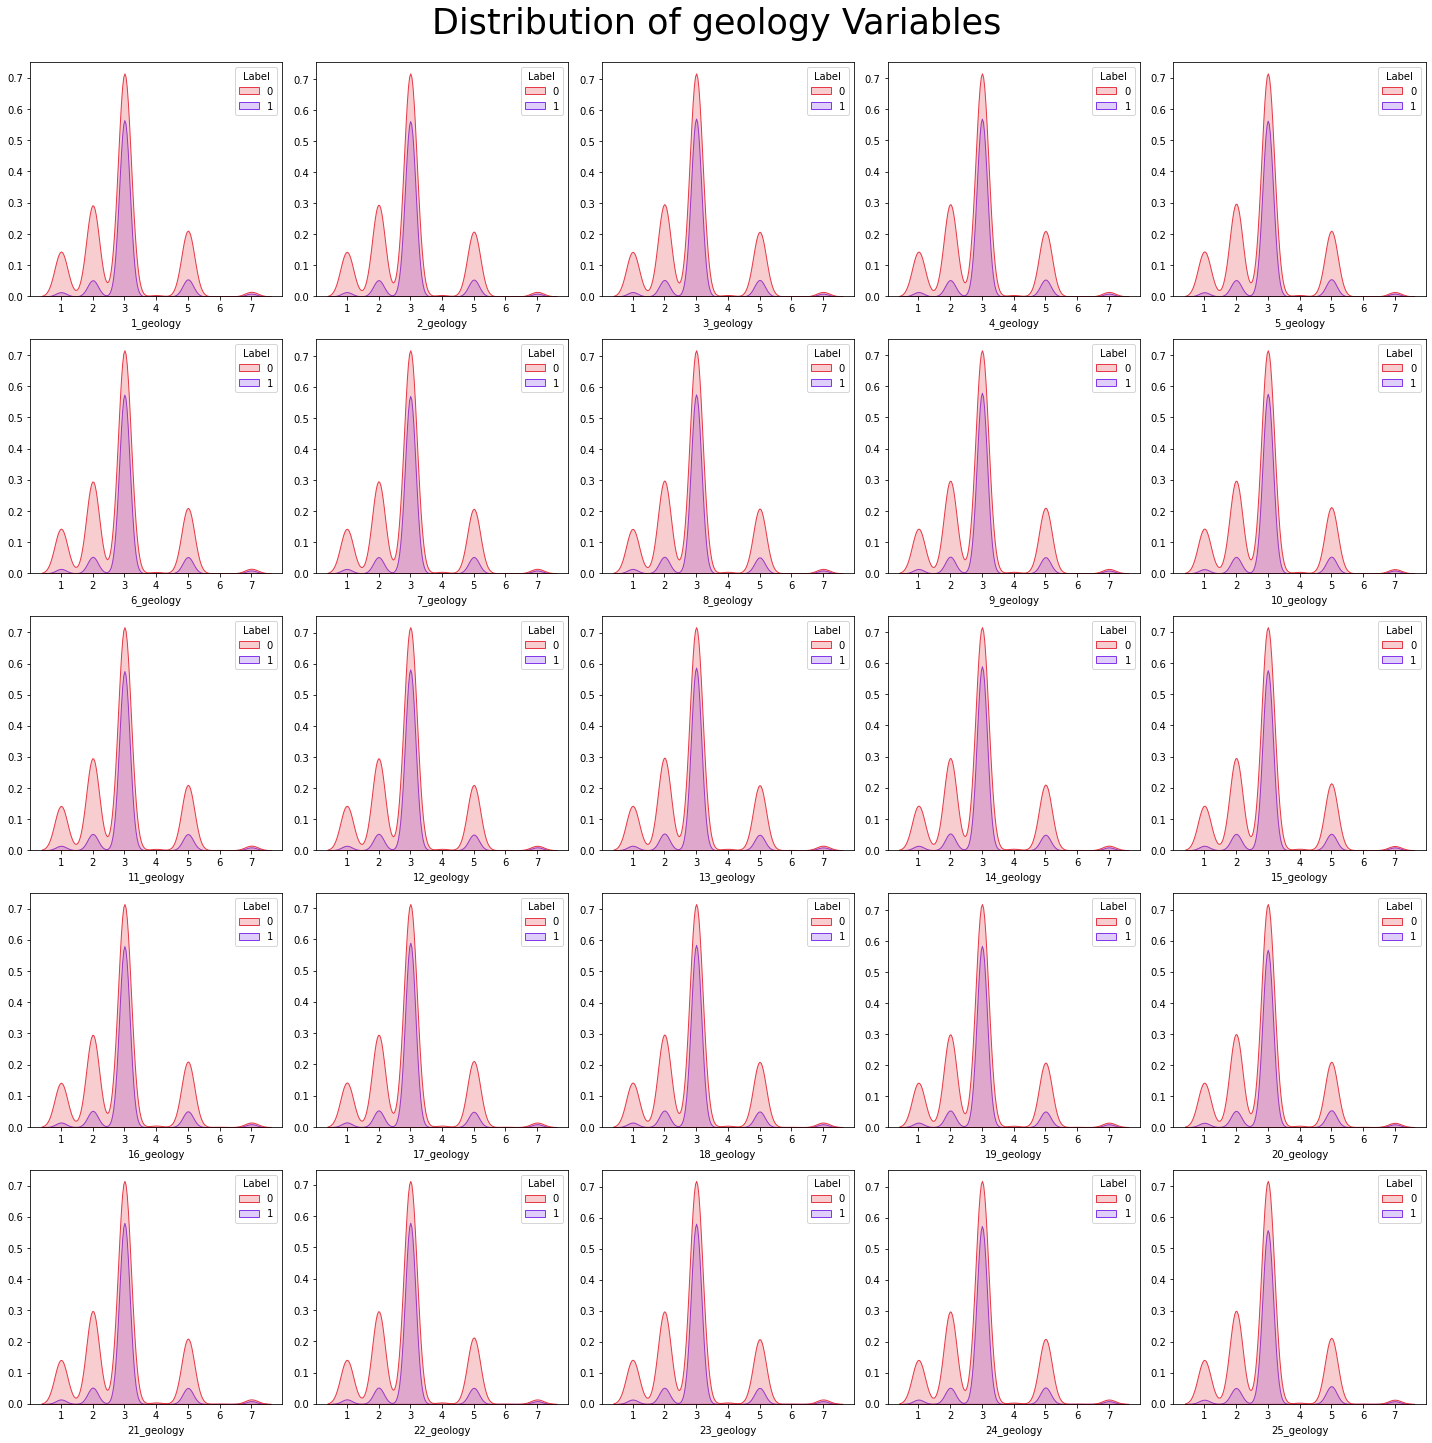

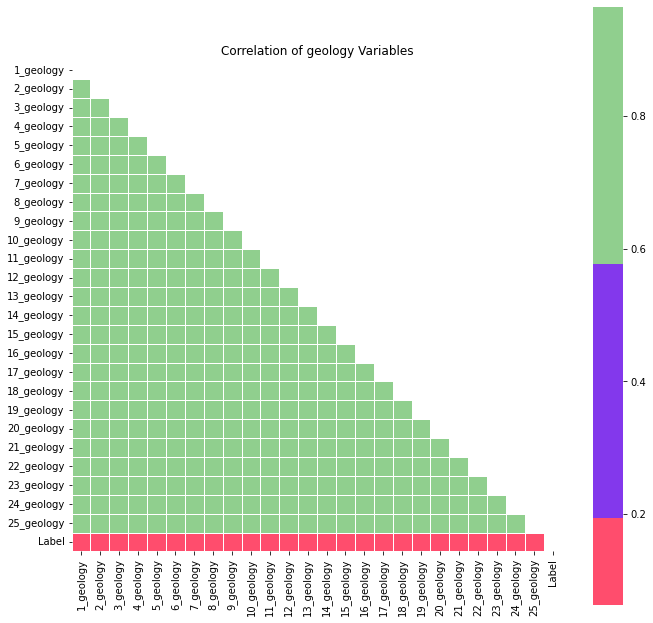

In [25]:
allf_features = base_num_features + base_cat_features

for num_feature in allf_features:    
    cols=[x  for x in df_train.columns if num_feature in x ]+["Label"]
    #print (f"num_feature: {num_feature} cols: {cols}")
    df=df_train[cols]
    fig, axes = plt.subplots(5, 5, figsize = (20,20))
    for i, ax in enumerate(axes.reshape(-1)):
        if i < len(cols) - 1:
            sns.kdeplot(x = cols[i], hue='Label', data = df[cols], fill = True, ax = ax, palette =["#e63946","#8338ec"])
            ax.tick_params()
            ax.xaxis.get_label()
            ax.set_ylabel('')
    title=f'Distribution of {num_feature} Variables'
    fig.suptitle(title, fontsize = 35, x = 0.5, y = 1)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize =(11,11))
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype = bool))
    sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
    title=f'Correlation of {num_feature} Variables'
    plt.title(title)
    plt.show()

In [26]:
palette = cycle(["#ffd670","#70d6ff","#ff4d6d","#8338ec","#90cf8e"])
targ = df_train.corrwith(df_train['Label'], axis=0)
val = [str(round(v ,1) *100) + '%' for v in targ.values]
fig = go.Figure()
fig.add_trace(go.Bar(y=targ.index, x= targ.values, orientation='h',text = val, marker_color = next(palette)))
fig.update_layout(title = "Correlation of variables with Target",width = 1200, height = 6000,
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)')

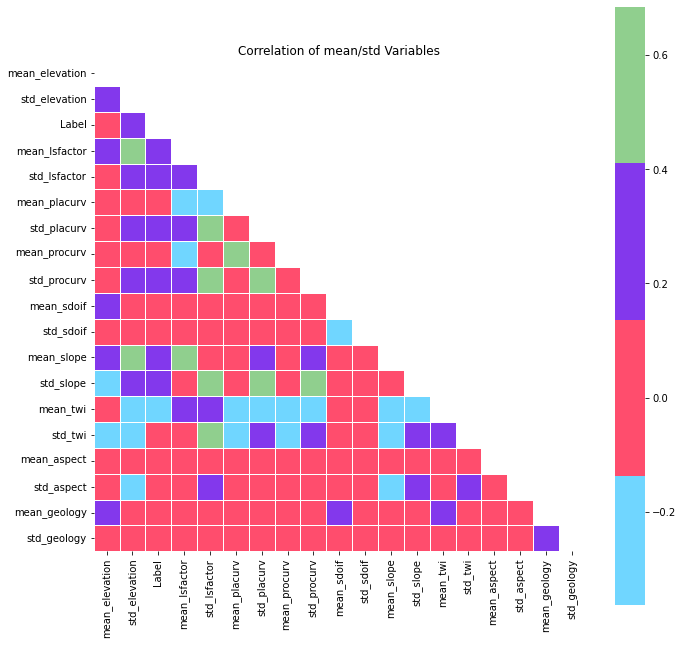

In [27]:
allf_features=base_num_features+base_cat_features
all_data=[]

for num_feature in allf_features:    
    cols=[x  for x in df_train.columns if num_feature in x ]
    df=df_train[cols]
    #print (f"num_feature: {num_feature} cols: {cols}")
    data=pd.concat([df.mean(axis=1),df.std(axis=1),df_train['Label']], axis=1)   
    data.rename(columns={0:'mean_'+num_feature,1:'std_'+num_feature},inplace=True)    
    all_data.append(data)
    continue
    fig, axes = plt.subplots(1, 2, figsize = (10,5))
    for i, ax in enumerate(axes.reshape(-1)):        
        if i < data.shape[1] - 1:
            sns.kdeplot(x = data.columns[i], hue='Label', data = data, fill = True, ax = ax, palette =["#e63946","#8338ec"])
            ax.tick_params()
            ax.xaxis.get_label()
            ax.set_ylabel('')
    title=f'Distribution of mean and std {num_feature} Variables'
    fig.suptitle(title, fontsize = 15, x = 0.5, y = 1)
    plt.tight_layout()
    plt.show()

df=pd.concat(all_data, axis=1)
df = df.loc[:,~df.columns.duplicated()]

plt.figure(figsize =(11,11))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
title=f'Correlation of mean/std Variables'
plt.title(title)
plt.show()

In [28]:
allf_features=base_num_features+base_cat_features
all_data=[]

for num_feature in allf_features:    
    
    cols=[x  for x in df_train.columns if num_feature in x ]
    df=df_train[cols]
    
    #print (f"num_feature: {num_feature} cols: {cols}")
    data=pd.concat([df.sum(axis=1),df.std(axis=1),df.mean(axis=1),df.var(axis=1),df.min(axis=1),df.max(axis=1),df_train['Label']], axis=1)   
    data.rename(columns={0:'sum_'+num_feature,1:'std_'+num_feature,2:'mean_'+num_feature,3:'var_'+num_feature,4:'min_'+num_feature,5:'max_'+num_feature},inplace=True)    
    all_data.append(data)
    continue
   
df=pd.concat(all_data, axis=1)
df = df.loc[:,~df.columns.duplicated()]


df.dropna(axis=1, how='all', inplace=True)
df.sample(3)

,sum_elevation,std_elevation,mean_elevation,var_elevation,min_elevation,max_elevation,Label,sum_lsfactor,std_lsfactor,mean_lsfactor,var_lsfactor,min_lsfactor,max_lsfactor,sum_placurv,std_placurv,mean_placurv,var_placurv,min_placurv,max_placurv,sum_procurv,std_procurv,mean_procurv,var_procurv,min_procurv,max_procurv,sum_sdoif,std_sdoif,mean_sdoif,var_sdoif,min_sdoif,max_sdoif,sum_slope,std_slope,mean_slope,var_slope,min_slope,max_slope,sum_twi,std_twi,mean_twi,var_twi,min_twi,max_twi,sum_aspect,std_aspect,mean_aspect,var_aspect,min_aspect,max_aspect,sum_geology,std_geology,mean_geology,var_geology,min_geology,max_geology
6487,4129.0,4.731807,165.16,22.390000,157.0,174.0,0,270.012572,1.496260,10.800503,2.238795,7.846470,13.553710,-0.009419,0.013327,-0.000377,0.000178,-0.019638,0.031513,-0.117480,0.005911,-0.004699,0.000035,-0.016227,0.007107,32.391668,0.000049,1.295667,2.354460e-09,1.295591,1.295747,836.27069,3.257724,33.450828,10.612766,28.30320,39.50971,125.096463,0.416516,5.003859,0.173486,4.253097,5.932380,8377.415200,5.617594,335.096608,31.557367,326.309900,345.9637,75.0,0.0,3.0,0.0,3.0,3.0
1187,539.0,3.392148,21.56,11.506667,16.0,27.0,0,179.436829,2.140912,7.177473,4.583503,4.323390,11.946670,-0.010950,0.021354,-0.000438,0.000456,-0.036702,0.042906,0.402677,0.025080,0.016107,0.000629,-0.067705,0.045314,31.816646,0.000026,1.272666,6.798067e-10,1.272615,1.272716,652.17602,7.112187,26.087041,50.583200,16.69924,42.16205,111.118332,0.943621,4.444733,0.890421,2.809752,5.885463,4536.711400,13.617432,181.468456,185.434463,161.565000,206.5650,25.0,0.0,1.0,0.0,1.0,1.0
4160,6347.0,3.562770,253.88,12.693333,247.0,260.0,0,168.489170,0.882852,6.739567,0.779427,5.254025,8.215033,-0.005013,0.010510,-0.000201,0.000110,-0.020708,0.017410,-0.237745,0.007666,-0.009510,0.000059,-0.028220,0.004657,31.832761,0.000266,1.273310,7.091159e-08,1.272824,1.273810,649.46740,3.467726,25.978696,12.025123,19.82703,31.31116,112.086078,0.514896,4.483443,0.265118,3.677281,5.339040,1062.015032,67.515117,42.480601,4558.290996,9.462322,360.0000,50.0,0.0,2.0,0.0,2.0,2.0


In [29]:
allf_features = base_num_features+base_cat_features
df2= df.copy()
all_VIF = pd.DataFrame([])

for num_feature in allf_features:    
    cols=[x  for x in df2.columns if num_feature in x ]+["Label"]
    #print (f"num_feature: {num_feature} \n   len cols: {len(cols)}")
    df=df2[cols]

    features = df.columns.tolist()
    #features.append('Label')
    VIF = calculate_vif(df, features)
    for _ in range(len(features)-2):
        #print(len(features))
        if VIF['VIF'].max() > 25:
            features.remove(VIF['VIF'].idxmax())
            VIF = calculate_vif(df, features)
    #print(VIF)        
    all_VIF = all_VIF.append(VIF[1:])

In [30]:
gc.collect()

15594

In [31]:
# define dataset
X = df_train[df_train.columns.difference(['Sample_ID', 'Label'])]
y = df_train['Label']

In [32]:
# doing pre-processing of the train and test dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
test_ids = df_test["Sample_ID"]
df_test = scaler.transform(df_test[df_train.columns.difference(['Sample_ID', 'Label'])])

In [33]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7443, 225)
y_train: (7443,)
X_test: (1861, 225)
y_test: (1861,)


In [38]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations = 3000,learning_rate=.0008, depth=7, l2_leaf_reg = 5, leaf_estimation_iterations = 100, random_state = 42, nan_mode ='Min',task_type ="CPU")
clf.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = 100) #### , cat_features=allf_features
preds = clf.predict_proba(X_test)[:, 1]

0:	learn: 0.6926592	test: 0.6926694	best: 0.6926694 (0)	total: 123ms	remaining: 6m 8s
100:	learn: 0.6482696	test: 0.6498564	best: 0.6498564 (100)	total: 6.59s	remaining: 3m 9s
200:	learn: 0.6114667	test: 0.6145020	best: 0.6145020 (200)	total: 12.8s	remaining: 2m 57s
300:	learn: 0.5803068	test: 0.5851588	best: 0.5851588 (300)	total: 19s	remaining: 2m 50s
400:	learn: 0.5545082	test: 0.5610927	best: 0.5610927 (400)	total: 25.1s	remaining: 2m 42s
500:	learn: 0.5329025	test: 0.5412447	best: 0.5412447 (500)	total: 31.2s	remaining: 2m 35s
600:	learn: 0.5145881	test: 0.5246096	best: 0.5246096 (600)	total: 37.6s	remaining: 2m 30s
700:	learn: 0.4990664	test: 0.5107302	best: 0.5107302 (700)	total: 43.7s	remaining: 2m 23s
800:	learn: 0.4854075	test: 0.4988099	best: 0.4988099 (800)	total: 49.9s	remaining: 2m 16s
900:	learn: 0.4734192	test: 0.4885271	best: 0.4885271 (900)	total: 56.1s	remaining: 2m 10s
1000:	learn: 0.4630038	test: 0.4797609	best: 0.4797609 (1000)	total: 1m 2s	remaining: 2m 4s
1100:	

In [35]:
y_preds = clf.predict(df_test)# = clf.predict_proba(df_test)[:, 1]
y_preds

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
df_subm["Label"] = y_preds
df_subm.to_csv('submission_catb.csv', index=False)
df_subm.sample(5)

,Sample_ID,Label
0,10865,0
1,10866,0
2,10867,0
3,10868,0
4,10869,1
...,...,...
5425,16290,0
5426,16291,0
5427,16292,0
5428,16293,0
